### Tools

In [1]:
# !pip install nibabel

In [2]:
#!pip install opencv-python

In [3]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [1]:
import numpy as np

In [2]:
import pandas as pd


In [3]:
import os
import nibabel as nib
from nibabel.testing import data_path
import matplotlib.pyplot as plt

In [4]:
import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image

In [5]:
import cv2 as cv

### 讀取nii檔案

In [6]:
data_path = "E:\ADNI"

In [7]:
ADNI_file = os.listdir(data_path)

In [8]:
image=[]

In [9]:
def process_folder(folder_path):
    # 取得資料夾中的所有檔案和子資料夾列表
    items = os.listdir(folder_path)
    for item in items:
        item_path = os.path.join(folder_path, item)
        # 如果是資料夾，則遞迴處理
        if os.path.isdir(item_path):
            process_folder(item_path)
        # 如果是 .nii 檔案，則讀取
        elif item.endswith('.nii'):
            # 使用 nibabel 讀取 .nii 檔案
            img = nib.load(item_path)
            # 在這裡您可以對讀取到的 .nii 檔案進行任何操作
            print("讀取到檔案:", item_path)
            image.append(img)

# 從根目錄開始遞迴處理資料夾
process_folder(data_path)

讀取到檔案: E:\ADNI\002_S_0413\MPR-R__GradWarp__B1_Correction\2006-05-02_12_40_13.0\I45122\ADNI_002_S_0413_MR_MPR-R__GradWarp__B1_Correction_Br_20070319120315662_S13894_I45122.nii
讀取到檔案: E:\ADNI\002_S_0413\MPR-R__GradWarp__B1_Correction\2006-11-15_09_38_31.0\I69533\ADNI_002_S_0413_MR_MPR-R__GradWarp__B1_Correction_Br_20070821172330232_S22558_I69533.nii
讀取到檔案: E:\ADNI\002_S_0413\MPR-R__GradWarp__B1_Correction\2007-06-01_07_12_09.0\I60013\ADNI_002_S_0413_MR_MPR-R__GradWarp__B1_Correction_Br_20070713121900076_S32939_I60013.nii
讀取到檔案: E:\ADNI\002_S_0413\MPR-R__GradWarp__B1_Correction\2008-07-31_14_48_05.0\I120922\ADNI_002_S_0413_MR_MPR-R__GradWarp__B1_Correction_Br_20081015123253905_S54590_I120922.nii
讀取到檔案: E:\ADNI\002_S_0413\MPR-R__GradWarp__B1_Correction\2009-05-04_14_42_56.0\I149745\ADNI_002_S_0413_MR_MPR-R__GradWarp__B1_Correction_Br_20090721100704322_S67061_I149745.nii
讀取到檔案: E:\ADNI\002_S_0413\MPR__GradWarp__B1_Correction\2006-05-02_12_31_52.0\I45118\ADNI_002_S_0413_MR_MPR__GradWarp__B1_

In [10]:
image = image[501:1281]

### 讀取對應著每個影像資訊的csv檔(label)

In [89]:
csv_path = "E:\data\ADNI1_Complete_2Yr_1.5T_4_14_2024.csv"
features = pd.read_csv(csv_path)
features

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I97341,941_S_1311,MCI,M,70,m06,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2007,NiFTI,4/08/2024
1,I143861,941_S_1311,MCI,M,71,m24,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/31/2009,NiFTI,4/10/2024
2,I97327,941_S_1311,MCI,M,69,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/02/2007,NiFTI,4/10/2024
3,I112538,941_S_1311,MCI,M,70,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,4/10/2024
4,I123812,941_S_1311,MCI,M,71,m18,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/21/2008,NiFTI,4/10/2024
...,...,...,...,...,...,...,...,...,...,...,...,...
2037,I118695,002_S_0413,CN,F,77,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled_2,Processed,11/15/2006,NiFTI,4/08/2024
2038,I118692,002_S_0295,CN,M,85,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled_2,Processed,11/02/2006,NiFTI,4/08/2024
2039,I45108,002_S_0295,CN,M,85,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,4/18/2006,NiFTI,4/10/2024
2040,I64025,002_S_0295,CN,M,86,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,5/25/2007,NiFTI,4/10/2024


### 把對應的影像(.nii) 與對應的標籤(AD,CN,MCI)做成一組組tuple

In [90]:
features['Subject']

0       941_S_1311
1       941_S_1311
2       941_S_1311
3       941_S_1311
4       941_S_1311
           ...    
2037    002_S_0413
2038    002_S_0295
2039    002_S_0295
2040    002_S_0295
2041    002_S_0295
Name: Subject, Length: 2042, dtype: object

In [91]:
headers = image[0].header
print(headers['db_name'])

AttributeError: 'numpy.ndarray' object has no attribute 'header'

In [92]:
train_data = []

for img in image:
  for ind , feature in enumerate(features['Subject']):
    x = str(img.header['db_name'].item())
    y = 'b\''+ feature + '\''
    if x == y:
      a = (img , features['Group'][ind])
      train_data.append(a)
      break


AttributeError: 'numpy.ndarray' object has no attribute 'header'

In [58]:
len(image) == len(train_data)

True

In [59]:
train_data_label = [train_data[i][1] for i in range(len(train_data))]

In [60]:
train_data_label

['CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'AD',
 'AD',
 'AD',
 'AD',
 'AD',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'AD',
 'AD',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'CN',
 'CN',
 'CN',
 'CN',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'CN',
 'CN',
 'CN',
 'CN',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'CN',
 'CN',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'AD',
 'AD',
 'CN',
 'CN',
 'AD',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'CN',
 '

### 查看原始影像維度

In [11]:
for i in range(len(image)):
  print(image[i].shape)

(240, 256, 160)
(192, 192, 160)
(192, 192, 160)
(240, 256, 160)
(192, 192, 160)
(240, 256, 160)
(192, 192, 160)
(240, 256, 160)
(240, 256, 160)
(192, 192, 160)
(240, 256, 160)
(192, 192, 160)
(192, 192, 160)
(240, 256, 160)
(192, 192, 160)
(240, 256, 160)
(192, 192, 160)
(240, 256, 160)
(240, 256, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(240, 256, 160)
(192, 192, 160)
(240, 256, 160)
(192, 192, 160)
(240, 256, 160)
(240, 256, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 146)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 146)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 256, 166)
(256, 25

In [12]:
len(train_data)

NameError: name 'train_data' is not defined

In [13]:
type(image[0])

nibabel.nifti1.Nifti1Image

In [14]:
train_data[0][0].affine

NameError: name 'train_data' is not defined

In [65]:
# 顯示 NIfTI 1 範例影像標頭資訊
x = train_data[0][0].header

x.get_zooms()

(0.9475275, 0.944205, 1.2023071)

In [66]:
type(image[0])

nibabel.nifti1.Nifti1Image

### 把不清楚的影像刪除

In [26]:
'''
indices_to_remove = [1,4,10,16,17,18,19,26,37,38,47,50,59 ,2,3,5,6,7,8,9,11,12,13,14,15,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,51,52,53,54,55,56,57,58]  # 要刪除的元素的索引列表

# 刪除指定索引的元素
for index in sorted(indices_to_remove, reverse=True):
    del image[index]
    del train_data_label[index]
    del train_data[index]

print('image len:',len(image))  # 輸出已刪除元素後的列表
print('train_data_label len:',len(train_data_label))
print('train_data len:',len(train_data))
'''

"\nindices_to_remove = [1,4,10,16,17,18,19,26,37,38,47,50,59 ,2,3,5,6,7,8,9,11,12,13,14,15,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,51,52,53,54,55,56,57,58]  # 要刪除的元素的索引列表\n\n# 刪除指定索引的元素\nfor index in sorted(indices_to_remove, reverse=True):\n    del image[index]\n    del train_data_label[index]\n    del train_data[index]\n\nprint('image len:',len(image))  # 輸出已刪除元素後的列表\nprint('train_data_label len:',len(train_data_label))\nprint('train_data len:',len(train_data))\n"

### 裁減掉頭盧以外的地方(3D)

In [12]:
def convert_binary(array,threshold):  #先二值化
  white = 255
  black=0
  initial_conv = np.where((array <= threshold),array,white)
  final_conv = np.where((initial_conv > threshold),initial_conv,black)

  return final_conv

In [13]:

for ind,img in enumerate(image):

  L = img.dataobj[:,:,:].shape[2]
#!!!!!!!!!!!!!!!!!!!!!!!!!!先對array做normalize，再用otsu二質化
  img_normal = img.dataobj[:,:,L//2] / img.dataobj[:,:,L//2].max()
  img_normal = img_normal * 255

  img_normal = img_normal.astype('uint8')

  ret, thresh = cv.threshold(img_normal , 0, 255,  cv.THRESH_OTSU)

  
#!!!!!!!!!!!!!!!!!!!!!!!!!
#用side view分析， 找出需要裁切的地方

  # 尋找非黑色像素值的範圍
  non_black_rows = np.where(~np.all(thresh == 0, axis=1))[0]
  non_black_cols = np.where(~np.all(thresh == 0, axis=0))[0]
  #print(non_white_rows,non_white_cols)
  # 確定裁剪的邊界
  top_row = non_black_rows.min()
  bottom_row = non_black_rows.max()
  left_col = non_black_cols.min()
  right_col = non_black_cols.max()
  #print(top_row,bottom_row,left_col,right_col)

  # 裁剪影像
  #cropped_image = thresh[top_row :bottom_row+1, left_col : right_col+1]

  image[ind] = image[ind].dataobj[top_row :bottom_row+1,left_col : right_col+1,:]

  #print(ind)



### 檢查有沒有影像缺失

In [14]:
for i in range(len(image)):
  if image[i].shape[0] <150 or image[i].shape[1] <150:
    print(i)

514
681
686
705
722
725


In [30]:
'''
if not os.path.exists('back_view_normalize_label'):
    os.makedirs('back_view_normalize_label')
'''

"\nif not os.path.exists('back_view_normalize_label'):\n    os.makedirs('back_view_normalize_label')\n"

In [31]:
'''
for i in range(len(image)):

  if image[i].shape[0] > 200:
    plt.imshow(image[i][:,256//2,:],cmap='gray',extent=[0,1,0,1])

    x_point=[0.2,0.8,0.8,0.2,0.2]
    y_point=[0.35,0.35,0.5,0.5,0.35]
    plt.plot(x_point,y_point,label='point',color='r')

    plt.savefig('back_view_normalize_label/back_view_normalize_label_{}_{}.jpg'.format(i,image[i].shape[0]))
    plt.show()
  else:

    plt.imshow(image[i][:,192//2,:],cmap='gray',extent=[0,1,0,1])

    x_point=[0.2,0.8,0.8,0.2,0.2]
    y_point=[0.4,0.4,0.6,0.6,0.4]
    plt.plot(x_point,y_point,label='point',color='r')

    plt.savefig('back_view_normalize_label/back_view_normalize_label_{}_{}.jpg'.format(i,image[i].shape[0]))
    plt.show()
'''


"\nfor i in range(len(image)):\n\n  if image[i].shape[0] > 200:\n    plt.imshow(image[i][:,256//2,:],cmap='gray',extent=[0,1,0,1])\n\n    x_point=[0.2,0.8,0.8,0.2,0.2]\n    y_point=[0.35,0.35,0.5,0.5,0.35]\n    plt.plot(x_point,y_point,label='point',color='r')\n\n    plt.savefig('back_view_normalize_label/back_view_normalize_label_{}_{}.jpg'.format(i,image[i].shape[0]))\n    plt.show()\n  else:\n\n    plt.imshow(image[i][:,192//2,:],cmap='gray',extent=[0,1,0,1])\n\n    x_point=[0.2,0.8,0.8,0.2,0.2]\n    y_point=[0.4,0.4,0.6,0.6,0.4]\n    plt.plot(x_point,y_point,label='point',color='r')\n\n    plt.savefig('back_view_normalize_label/back_view_normalize_label_{}_{}.jpg'.format(i,image[i].shape[0]))\n    plt.show()\n"

### 視覺化影像

In [32]:
'''
from nibabel.viewers import OrthoSlicer3D
for i in range(len(image)):
# 建立 OrthoSlicer3D Viewer 物件
  osViewer = OrthoSlicer3D(image[i].dataobj[:,:,:])

# 設定三軸的切面位置
  osViewer.set_position(192//2, 192//2, 160//2)   #(88,120,128)

  # 顯示三軸切面
  osViewer.show()
'''

'\nfrom nibabel.viewers import OrthoSlicer3D\nfor i in range(len(image)):\n# 建立 OrthoSlicer3D Viewer 物件\n  osViewer = OrthoSlicer3D(image[i].dataobj[:,:,:])\n\n# 設定三軸的切面位置\n  osViewer.set_position(192//2, 192//2, 160//2)   #(88,120,128)\n\n  # 顯示三軸切面\n  osViewer.show()\n'

### 對每組nii檔案 把海馬體切出來(每組n片)(取30片)

In [ ]:
for i in range(len(image)):
    if i <10:
        plt.imshow(image[i][:,:,160//2],cmap='gray',extent=[0,1,0,1])
        plt.show()

In [15]:
for i in range(len(image)):
    if i <10:
        x,y=int(image[i].shape[0]*(1-0.8)),int(image[i].shape[0]*(1-0.6))
        print(y-x)


43
36
34
44
34
41
34
43
41
30


In [17]:
import matplotlib.pyplot as plt
image_file = [[] for i in range(len(image))]

if not os.path.exists('image_folder'):
    os.makedirs('image_folder')
# 繪製多張切面圖
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        axes[i].axis('off')

# 建立各軸切面

for i in range(len(image)):   #每一組nii檔案
  x,y=int(image[i].shape[0]*(1-0.8)),int(image[i].shape[0]*(1-0.6))


  for j in range(y-x):     #每組腦室位置的切片


    slice1 = image[i][ x+j , : , :]

    image_file[i].append(slice1)

    #slice1_img = plt.imshow(slice1,cmap='gray',extent=[0,1,0,1])
  #plt.show()






In [18]:
for i in range(len(image_file)):
  print(len(image_file[i]))

43
36
34
44
34
41
34
43
41
30
43
35
31
42
34
40
33
41
44
34
33
31
42
34
40
34
41
44
35
33
32
32
45
44
46
45
44
44
46
45
46
45
47
47
46
47
45
47
47
46
44
45
47
44
44
45
46
44
44
46
39
42
44
47
38
43
44
46
47
43
44
46
47
43
43
44
42
46
46
41
42
48
45
43
44
42
45
46
41
42
47
45
46
48
49
45
43
45
48
49
45
43
49
47
49
48
45
49
47
49
48
45
48
48
47
46
47
48
47
48
46
47
47
46
46
44
48
47
46
46
44
47
46
37
34
36
46
37
35
37
43
38
38
38
38
42
38
38
42
37
43
40
41
39
43
41
41
39
44
46
44
47
47
44
46
44
47
47
44
44
45
47
41
46
44
44
45
47
41
45
44
45
50
49
48
44
46
50
49
47
44
45
45
46
41
43
45
46
46
41
44
46
44
46
46
44
46
44
46
46
45
43
43
47
42
44
43
43
47
42
45
46
47
48
45
46
47
47
44
44
47
47
46
44
44
47
47
46
36
36
37
36
36
36
36
37
36
36
39
37
37
34
34
35
38
36
37
34
34
35
36
36
37
34
36
37
36
36
36
36
37
34
37
36
33
34
34
36
33
33
35
35
34
33
35
35
34
33
35
32
34
32
34
32
34
32
33
32
33
35
35
33
32
32
34
35
33
38
39
39
40
44
38
40
39
40
43
34
34
37
35
36
34
34
35
37
35
36
36
35
32
32
31
3

In [ ]:
for i in range(len(image_file[0])):
  plt.imshow(image_file[0][i],cmap='gray')
  #plt.axis('off')
  plt.show()

### 裁減黑色邊緣，只留頭部

In [78]:
image_file[0][0].max()

2052.2217

In [19]:

# 尋找非黑色像素值的範圍
crop_img=[[] for i in range(len(image_file))]

for ind , img in enumerate(image_file):

  for slide in img:


    #!!!!!!!!!!!!!!!!!!!!!!!!!!先對array做normalize，再用otsu二質化
    img_normal = slide / slide.max()
    img_normal = img_normal * 255

    img_normal = img_normal.astype('uint8')

    ret, thresh = cv.threshold(img_normal , 0, 255,  cv.THRESH_OTSU)   
  #!!!!!!!!!!!!!!!!!!!!!!!!!

    non_black_rows = np.where(~np.all(thresh == 0, axis=1))[0]
    non_black_cols = np.where(~np.all(thresh == 0, axis=0))[0]
    #print(non_white_rows,non_white_cols)
    # 確定裁剪的邊界
    top_row = non_black_rows.min()
    bottom_row = non_black_rows.max()
    left_col = non_black_cols.min()
    right_col = non_black_cols.max()
    #print(top_row,bottom_row,left_col,right_col)

    # 裁剪影像
    cropped_image = slide[top_row : bottom_row + 1 , left_col : right_col + 1]    #+20是把眼睛鼻子切掉
    crop_img[ind].append(cropped_image)



In [ ]:


for i in range(len(crop_img[0])):
  if i<10:
    plt.imshow(crop_img[0][i],cmap='gray')
    plt.show()



### resize 每一片切片成(256,256)

In [18]:
len(crop_img[0])

48

In [82]:
if not os.path.exists('image_folder'):
    os.makedirs('image_folder')

In [20]:

resize_image=[[] for i in range(len(crop_img))]
for ind ,data in enumerate(crop_img):
  for slideind ,slide in enumerate(data):


    img = Image.fromarray(slide)   # numpy轉image類
    im = np.array(img)        #image 轉 numpy

    p = cv2.resize(im,(256,256))
    resize_image[ind].append(p)




    #plt.imshow(slide,cmap='gray',extent=[0,1,0,1])

    #plt.axis('off')
    #plt.savefig('image_folder/slide{}_{}.jpg'.format(ind,slideind))
    #plt.show()


In [44]:
#check
'''
for i in range(len(resize_images[5])):
  plt.imshow(resize_images[5][i],cmap='gray')
  plt.show()
'''

"\nfor i in range(len(resize_images[5])):\n  plt.imshow(resize_images[5][i],cmap='gray')\n  plt.show()\n"

### 標記(程式碼需優化)

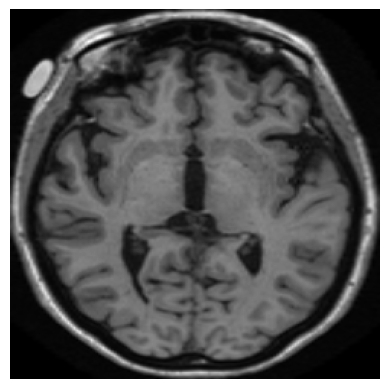

In [21]:
for i in range(len(resize_image[2])):
  plt.imshow(resize_image[2][i],cmap='gray',extent=[0,1,0,1])
  plt.axis('off')
  #plt.show()

### 裁切範圍 x軸 : 0.2 - 0.8 y軸 : 0.1 - 0.8

In [46]:
x_start ,x_end = int(256 *0.2) , int(256 * 0.8)
y_start ,y_end = int(256 *0.1) , int(256 * 0.7)




In [47]:
x_start ,x_end

(51, 204)

In [48]:
y_start , y_end

(25, 179)

### 視覺化要裁切的部分

In [49]:
'''
for ind , img in enumerate(resize_image):
  for slideind , slide in enumerate(img):
    #print(img.shape)
    if slideind == 5 and ind ==5:
      plt.imshow(slide,cmap='gray',extent=[0,1,0,1])

      # 在圖像中標記一塊區域
      x_point = [0.2 ,0.8 ,0.8 ,0.2 ,0.2]
      y_point = [0.1 ,0.1 ,0.7 ,0.7, 0.1]
      plt.plot(x_point, y_point, color='red', label='Point')
      plt.show()

'''



"\nfor ind , img in enumerate(resize_image):\n  for slideind , slide in enumerate(img):\n    #print(img.shape)\n    if slideind == 5 and ind ==5:\n      plt.imshow(slide,cmap='gray',extent=[0,1,0,1])\n\n      # 在圖像中標記一塊區域\n      x_point = [0.2 ,0.8 ,0.8 ,0.2 ,0.2]\n      y_point = [0.1 ,0.1 ,0.7 ,0.7, 0.1]\n      plt.plot(x_point, y_point, color='red', label='Point')\n      plt.show()\n\n"

### 裁減掉海馬體以外的區塊

In [50]:
slide1_ventricles=[[] for i in range(len(resize_image))]
for ind , img in enumerate(resize_image):

  for slide in img:

    height, width = slide.shape[:2]

    # 计算裁剪区域的最小矩形边界
    x_min, x_max = x_start, x_end
    y_min, y_max = y_start, y_end

    # 由于图像坐标系（0,0）在左上角，而matplotlib的（0,0）在左下角，可能需要调整y坐标
    y_min, y_max = height - y_max, height - y_min

    # 裁剪图像
    cropped_img = slide[int(y_min):int(y_max), int(x_min):int(x_max)]
    slide1_ventricles[ind].append(cropped_img)

    # 展示裁剪后的图像
    #plt.imshow(cropped_img,cmap='gray')
    #plt.axis('off')
    #plt.show()


### 重新resize腦室維度

In [51]:
for i in range(len(slide1_ventricles)):
    print(len(slide1_ventricles[i]))

47
44
46
47
44
47
44
46
47
44
44
47
43
46
48
48
48
48
49
45
46
49
49
48
48
49
50
49
49
50
45
48
47
45
48
48
46
45
46
45
47
47
47
48
46
45
45
44
48
47
47
46
46
48
48
45
35
36
35
37
35
36
33
33
33
34
36
32
34
34
32
44
50
41
48
43
41
41
49
41
45
41
41
45
41
45
47
42
42
44
42
42
48
43
43
41
47
41
48
40
41
41
39
41
40
39
39
47
47
46
46
46
46
43
45
47
47
45
45
44
48
44
43
45
45
49
47
48
49
47
44
44
45
46
45
43
45
43
45
46
44
46
48
44
46
47
43
44
47
47
43
43
47
43
49
46
47
46
46
46
46
46
49
50
47
49
42
42
45
47
47
43
48
47
45
48
45
49
47
48
46
46
47
48
45
50
46
45
47
47
47
47
47
48
45
48
45
49
48
48
49
48
46
48
44
46
48
48
47
50
48
40
40
48
40
48
43
46
48
49
49
50
49
34
34
36
35
34
36
33
33
34
33
34
36
36
34
35
33
35
34
34
34
34
35
34
34
34
37
34
35
35
34
35
35
35
32
34
34
35
34
36
36
36
36
34
34
36
35
33
33
33
35
35
48
48
48
48
48
48
45
49
45
45
49
45
47
47
49
48
49
48
46
48
49
46
48
49
47
46
46
47
46
46
46
46
48
46
46
47
50
46
47
50
46
48
46
46
48
48
48
47
48
48
46
47
46
46
47
47
46
45
47
4

In [52]:
slide1_ventricles[0][0].shape

(154, 153)

In [53]:
slide1_ventricles_resize=[[] for i in range(len(slide1_ventricles))]
for ind ,img in enumerate(slide1_ventricles):
  for slide in img:
    image = cv2.resize(slide,(128,128))
    slide1_ventricles_resize[ind].append(image)
    #plt.imshow(image,cmap='gray')
    #plt.axis('off')
    #plt.show()


### Final

In [43]:
len(slide1_ventricles_resize)

NameError: name 'slide1_ventricles_resize' is not defined

### 加上label

In [86]:
len(train_data_label)

2042

In [45]:
len(train_data_label) == len(slide1_ventricles_resize)

True

In [57]:
dataset = [[slide1_ventricles_resize[i] , train_data[i][1]] for i in range(len(train_data_label))]

In [58]:
len(dataset)

2294

In [59]:
len(dataset[0][0])

47

### dataset = [(30片切片,label),(30片切片,label) ....,(30片切片 ,label) ]

### 儲存最終圖片

In [60]:
'''
#刪除目錄上有內容物的資料夾程式碼，目的:當資料有誤要重新執行時

import shutil

# 指定要刪除有內容物的目錄路徑
directory_path = 'C:\Users\ 208\ bigwind\slide1_ventricle'

try:
    shutil.rmtree(directory_path)
    print(f"The directory '{directory_path}' and all its contents have been removed")
except Exception as error:
    print(f"Error: {error}. Failed to remove '{directory_path}' and its contents")

'''


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 483-484: truncated \UXXXXXXXX escape (262865368.py, line 1)

In [93]:
resize_image
if not os.path.exists('slide2_ventricle_no_crop'):
    os.makedirs('slide2_ventricle_no_crop')


In [22]:

for ind ,data in enumerate(resize_image):

  for slideind,slide in enumerate(data):
    # 歸一化到0到255
    normalized_image = cv2.normalize(slide, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    file_path = os.path.join('E:\CN_no_crop', 'slide_{}a_{}.jpg'.format(ind+500, slideind))

    cv2.imwrite(file_path, normalized_image, [int(cv2.IMWRITE_JPEG_QUALITY), 90])



In [ ]:
slide1_ventricles_resize

In [ ]:
#len(slide1_ventricles_resize)

### 匯出label

In [63]:
labels1 = pd.Series(train_data_label)

In [64]:
labels1.to_csv('labels.csv', index=True)  # index=False 表示不保存行索引

In [ ]:
#pd.DataFrame(dataset)

### Model